# Project Ringbauer 2025 onto PCA
Idea: Find Greek samples to extract and test in IBD run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(sys.version)
    
if socket_name.startswith("bionc") or socket_name.startswith("hpc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/git/projectPCA/"   
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
     
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version_info)

from projectPCA.eigenstrat_funcs import load_genos_autoeager, update_values
from projectPCA.proj_pca import *
from hapsburg.PackagesSupport.loadEigenstrat.loadEigenstrat load load_eigenstrat

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/git/projectPCA
CPU Count: 128
sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


### Load Standard PCA background

In [2]:
### HO PCs
df_ho = pd.read_csv("/mnt/archgen/users/hringbauer/git/projectPCA/projectPCA/data/we_v1/20250422.ho_projections.tsv", 
                  sep="\t")

print(f"Loaded {len(df_ho)} PC values.")

### SNP weights
dfw = pd.read_csv("/mnt/archgen/users/hringbauer/git/projectPCA/projectPCA/data/we_v1/20250422.ho_ptn_weights_p.tsv", 
                  sep="\t")
print(f"Loaded {len(dfw)} SNP weights.")

Loaded 1250 PC values.
Loaded 531927 SNP weights.


In [25]:
def project_eigenstrat_file(es_path="", dfw=[], df_bgrd_pcs=[],
                            savepath="", fig_path="", plot=True, min_snps=10000):
    """Load and project eigenstrat file. Plot, save, and return PC projection dataframe
    es_path: Path to the target eigenstrat (up to .geno, .ind and .snp)
    dfw: Weight file to use
    savepath: Where to save the output table of PC coordinates. If empty, do not save.
    fig_path: Where to save the figure of the PC projection. If empty, not plot saved.
    df_bgrd_pcs: Which background PCs to plot"""

    es = load_eigenstrat(es_path) # Load the eigenstrat Object
    df_ind = es.load_ind_df()
    df_snp = es.load_snp_df()
    df_snp.columns = ["snp", "ch", "map", "pos", "ref", "alt"]

    iids = df_ind["iid"][:].values
    df_pc = proj_iids_ESobj(iids=iids, es=es, dfw=dfw, df_snp=df_snp, min_snps=min_snps)

    if len(savepath)>0:
        df_pc.to_csv(savepath, index=False, sep="\t")
    
    if plot:
        plot_df_pc(df_pcs=df_pc, df_bgrd_pcs=df_ho, savepath=fig_path)
    return df_pc


def plot_df_pc(df_pcs=[], df_bgrd_pcs=[], 
               figsize=(6,6), s=30, lw=0.7, 
               savepath="", plot=True):
    """Plot a simple PCA:
    df_pcs: Value of the PCA to plot
    df_bgrd_pcs: Pandas dataframe with columns pc1 and pc2.
    Usually pre-computed.If given, plot the values of this background."""

    plt.figure(figsize=figsize)
    ax=plt.gca()

    if len(df_bgrd_pcs)>0:
        ax.scatter(df_bgrd_pcs["pc1"], df_bgrd_pcs["pc2"], c="silver", s=15, alpha=0.5)
    
    for _, row in df_pcs.iterrows():
        ax.scatter(row["pc1"], row["pc2"], lw=lw, 
                   s=s, edgecolor="k", label = row["iid"])
    
    ### Formatting Plot
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(loc="upper right")
    
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=600)

    if plot:
        plt.show()

#################################
### Class to give projection files
class Projection_Files(object):
    """Class the required files for projection.
    E.g. Return SNP weight file, as well as modern background"""

    dfw = "" # SNP weight File
    df_bgrd_pcs = "" # Default Projections

    def get_snp_weights(self):
        """Return SNP weight dataframe."""
        return self.dw

    def get_projections_ref(self):
        """Return the default Projections."""
        return self.df_bgrd_pcs
        


class Projection_Files_HO(Projection_Files):
    """HO Origin Projection"""
    
    
    def __init__(self):
        self.dfw = ""
        self.df_bgrd_pcs = ""
         
    
    

def get_projection_files(mode=""):
    """Factory Function to return the right Projection_Files object. Currently implemented:
    HO: Human origin projection
    """

    if mode=="HO":
        return Projection_Files_HO()

    else:
        raise RuntimeWa
    

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3199378220.py, line 90)

In [ ]:
print()

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs
Filtering 143528/531927 fixed SNPs.


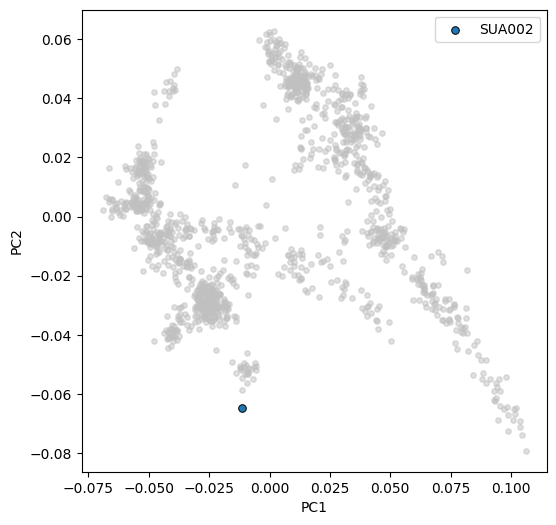

,pc1,pc2,#SNP,iid
0,-0.011584,-0.06484,334433,SUA002


In [23]:
project_eigenstrat_file(es_path="/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double",
    dfw=dfw, df_bgrd_pcs=df_ho)

## Load example data

In [22]:
es = load_eigenstrat("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double")

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs


### Load Sardinia data

In [6]:
### Load AADR eigenstrat
#es = load_eigenstrat("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/punic208.v54.3_1240k")
es = load_eigenstrat("/mnt/archgen/Autorun_eager/eager_outputs/TF/SUA/SUA002/genotyping/pileupcaller.double")
df_ind = es.load_ind_df()

### Load SNP file
df_snp = es.load_snp_df()
df_snp.columns = ["snp", "ch", "map", "pos", "ref", "alt"]

### Load meta file (from SI of Ringbauer 2025)
#df_meta = pd.read_csv("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/SupplementaryTables.tsv", sep="\t")
#dft = pd.merge(df_meta, df_ind, on="iid")
#print(f"Found {len(dft)}/{len(df_meta)} iids in .ind file")

Eigenstrat packed: False
3 Eigenstrat Files with 1 Individuals and 1233013 SNPs


# Get PCA Projection of IID

In [10]:
%%time
iids = df_ind["iid"][:].values
df_pc = proj_iids_ESobj(iids=iids, es=es, dfw=dfw, df_snp=df_snp, min_snps=10000)

Filtering 143528/531927 fixed SNPs.
CPU times: user 2.41 s, sys: 156 ms, total: 2.57 s
Wall time: 2.57 s


### [QC] Plot the PCA

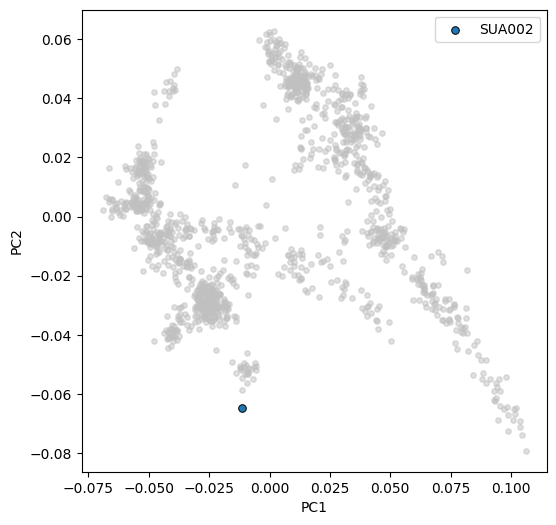

In [18]:
plot_df_pc(df_pcs=df_pc, df_bgrd_pcs=df_ho)

### Merge and save output

In [16]:
df_out = pd.merge(dft, df_pc, on="iid")

In [20]:
df_out.to_csv("/mnt/archgen/users/hringbauer/data/ringbauer2025_es/meta_pca.tsv", sep="\t", index=False)